# 基于用户画像的消费行为分析

本次分析目的是为了**了解用户构成，优化运营策略**。通过对用户年龄、性别、婚姻、教育分布等各方面的分析，进行用户画像勾勒，通过消费行为的分析，了解用户的消费能力和消费习惯，并通过帕累托分析识别出核心用户，帮助决策者高效分配资源。

## 1. 数据质量与基本统计分析

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 加载数据
df = pd.read_csv(r'D:\DA_Projects\data\e-commerce_user_order_data.csv',engine='python',encoding='gbk')

In [3]:
# 数据概览
print("数据集形状:", df.shape)
print("\n前5行数据:")
display(df.head())

数据集形状: (5000, 8)

前5行数据:


,用户ID,用户出生日期,性别,婚姻状况,文化程度,下单时间,订单ID,交易金额
0,6414111,1991-8-24,男,已婚,本科,2020-1-1 17:41,1000595826,402.765811
1,6516117,1983-7-21,女,已婚,博士,2021-10-15 22:47,1000610643,545.273062
2,6714112,1986-6-21,女,已婚,博士,2020-11-22 9:45,1001934364,256.716973
3,5311117,1978-5-25,女,未婚,大专,2021-3-26 11:53,1007749907,275.547080
4,4316113,1979-8-1,男,未婚,大专,2021-7-10 18:59,1007770144,1023.500156


In [4]:
print("\n数据集信息:")
df.info()


数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户ID    5000 non-null   int64  
 1   用户出生日期  5000 non-null   object 
 2   性别      5000 non-null   object 
 3   婚姻状况    5000 non-null   object 
 4   文化程度    5000 non-null   object 
 5   下单时间    5000 non-null   object 
 6   订单ID    5000 non-null   int64  
 7   交易金额    5000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 312.6+ KB


In [5]:
print("\n描述性统计:")
display(df.describe())


描述性统计:


,用户ID,订单ID,交易金额
count,5.000000e+03,5.000000e+03,5000.000000
mean,4.969176e+06,4.997895e+09,573.829124
std,1.029904e+06,2.319743e+09,280.694798
min,3.211111e+06,1.000596e+09,0.956799
25%,4.113111e+06,3.020587e+09,356.970068
50%,4.919116e+06,4.982446e+09,572.713415
75%,5.819114e+06,7.002376e+09,785.026698
max,6.720120e+06,8.997661e+09,1311.236335


In [6]:
# 检查缺失值
print("\n缺失值统计:")
missing_data = df.isnull().sum()
display(missing_data[missing_data > 0])


缺失值统计:


Series([], dtype: int64)

In [7]:
# 检查重复值
print(f"\n重复订单数量: {df.duplicated(subset=['订单ID']).sum()}")
print(f"重复用户记录: {df.duplicated(subset=['用户ID']).sum()}")


重复订单数量: 2
重复用户记录: 2538


In [8]:
# 去重
df_unique = df.drop_duplicates()

In [9]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户ID    5000 non-null   int64  
 1   用户出生日期  5000 non-null   object 
 2   性别      5000 non-null   object 
 3   婚姻状况    5000 non-null   object 
 4   文化程度    5000 non-null   object 
 5   下单时间    5000 non-null   object 
 6   订单ID    5000 non-null   int64  
 7   交易金额    5000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 312.6+ KB


数据还是5000行，说明数据集中没有完全一样的数据行（即没有重复数据）

In [10]:
print("\n日期范围:", df['下单时间'].min(), "至", df['下单时间'].max())


日期范围: 2019-12-10 11:14 至 2023-6-4 6:15


# 2. 用户基本特征分析

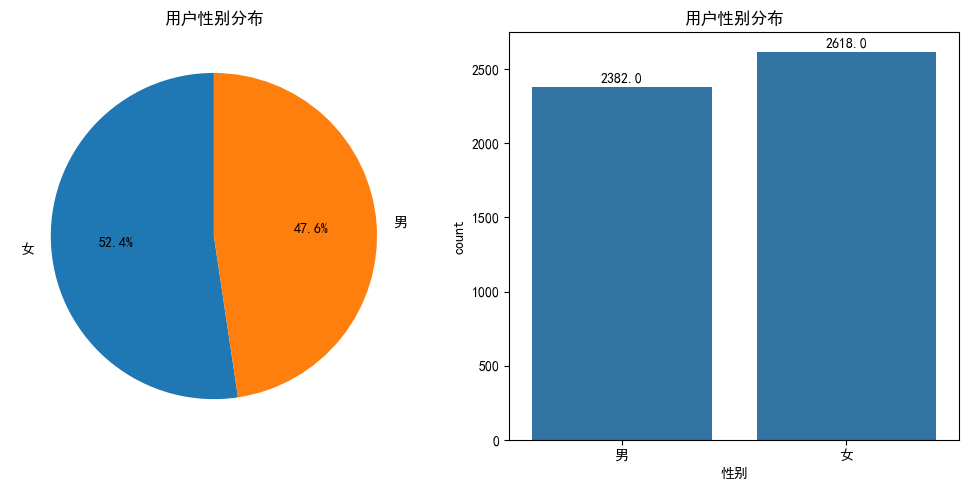

In [11]:
# 2.1 性别分布
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
gender_counts = df['性别'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index,startangle = 90, autopct='%1.1f%%')
plt.title('用户性别分布')

plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='性别')
for p in ax.patches:
    height = p.get_height() 
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 30,                   
            s=f'{height}',                   
            ha='center')                      
plt.title('用户性别分布')
plt.tight_layout()
plt.show()

由上图可知：在所有订单数据中，其中为女性用户的订单量为52.4%，男性用户为47.6%。该数据为男女订单量的分布，而非男女用户人数的分布。

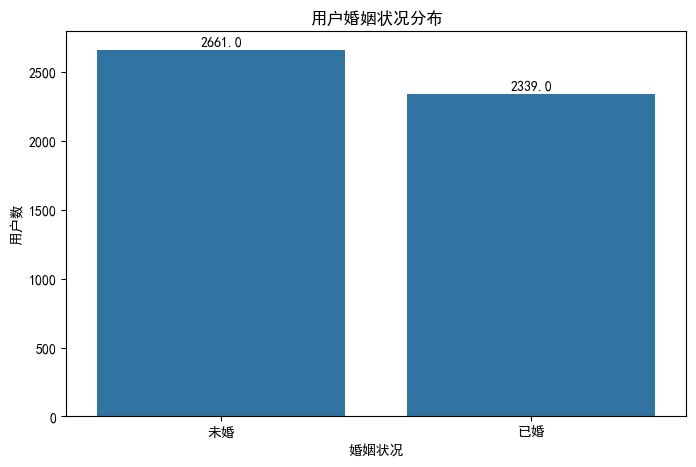

In [12]:
# 2.2 婚姻状况分布
plt.figure(figsize=(8, 5))
marital_counts = df['婚姻状况'].value_counts()
ax = sns.barplot(x=marital_counts.index, y=marital_counts.values)
for p in ax.patches:
    height = p.get_height() 
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=height + 30,                   
            s=f'{height}',                   
            ha='center')  
plt.title('用户婚姻状况分布')
plt.ylabel('用户数')
plt.show()

由上图可知：在所有订单数据中，未婚用户的下单量比已婚用户下单量多。

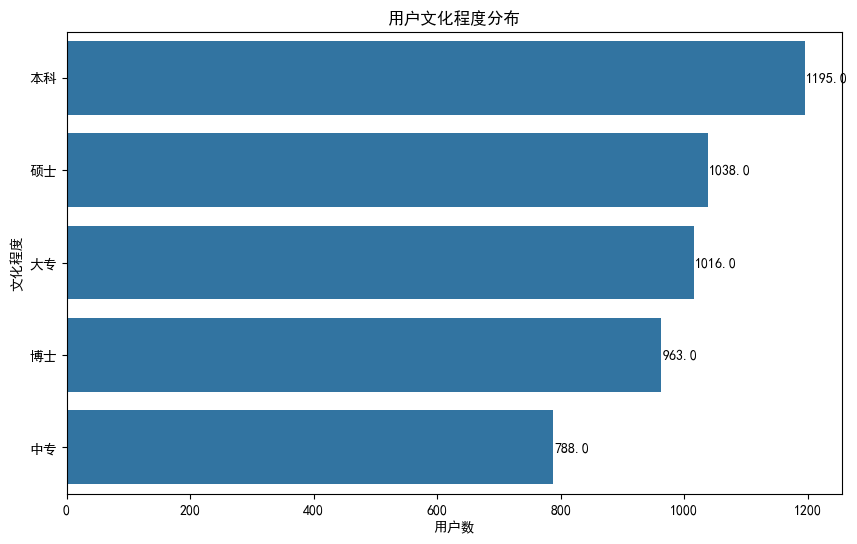

In [13]:
# 2.3 文化程度分布
df.loc[df['文化程度'] == '研究生', '文化程度'] = '硕士'#将原始数据中研究生改为硕士，以区分硕士研究生与博士研究生
plt.figure(figsize=(10, 6))
education_counts = df['文化程度'].value_counts()
ax = sns.barplot(x=education_counts.values, y=education_counts.index)
for p in ax.patches:
    width = p.get_width() 
    ax.text(x=width + 2,                    
            y=p.get_y() + p.get_height() / 2.,
            s=f'{width:.1f}',                  
            ha='left',
            va='center')
plt.title('用户文化程度分布')
plt.xlabel('用户数')
plt.show()

由上图可知：在所有下单数据中，下单量最多的用户群体为本科，其次硕士，最少的是中专。

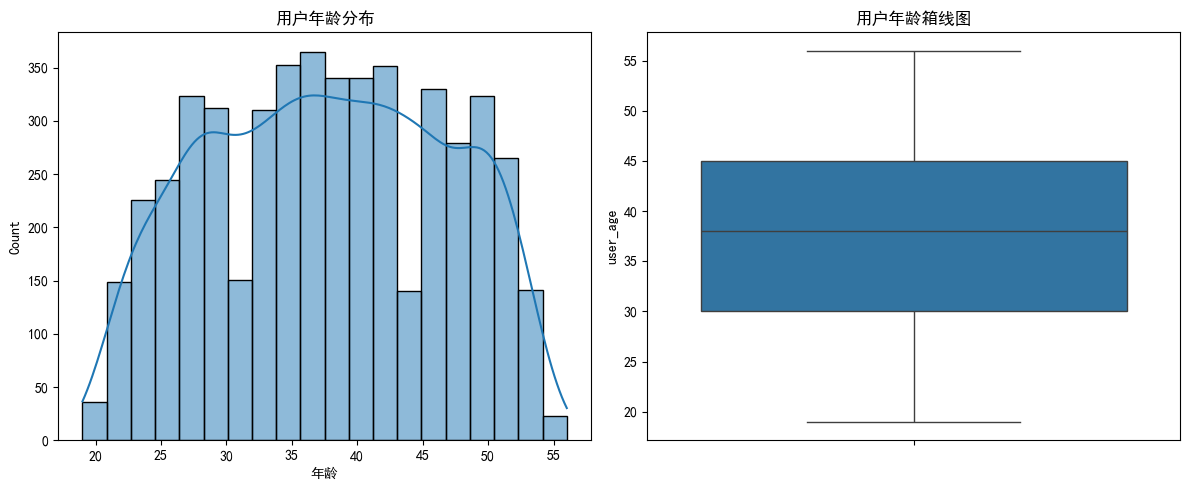

In [14]:
# 2.4 计算用户年龄并分析年龄分布
df['order_time'] = pd.to_datetime(df['下单时间'])
df['user_birthday'] = pd.to_datetime(df['用户出生日期'])
df['user_age'] = (df['order_time'].dt.year - df['user_birthday'].dt.year)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['user_age'], bins=20, kde=True)
plt.title('用户年龄分布')
plt.xlabel('年龄')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['user_age'])
plt.title('用户年龄箱线图')
plt.tight_layout()
plt.show()

从图中可以看出：1.
年龄在 20 岁左右时，用户数量较少，随着年龄增长，用户数量逐渐上升。2.
到 35 - 40 岁左右，用户数量达到峰值，是用户最为集中的年龄段3.。
之后，随着年龄继续增大，用户数量呈现出逐渐下降的趋势，尤其是在 50 岁之后，下降速度较为明显，到 55 岁时，用户数量已经很少了。
整体而言，该用户群体主要集中在 35 - 40 岁这个年龄段，呈现出中间年龄段用户多，两端年龄段（年轻和年长）用户少的分布特点。

In [15]:
# 检查异常年龄值
print(f"最小年龄: {df['user_age'].min()}")
print(f"最大年龄: {df['user_age'].max()}")

最小年龄: 19
最大年龄: 56


# 3. 销售数据分析

In [16]:
# 3.1 总体销售情况
print(f"总销售额: {df['交易金额'].sum():.2f}")
print(f"总订单数: {df['订单ID'].nunique()}")
print(f"平均订单价值: {df['交易金额'].mean():.2f}")
print(f"独立用户数: {df['用户ID'].nunique()}")
print(f"客单价: {df['交易金额'].sum()/df['用户ID'].nunique():.2f}")

总销售额: 2869145.62
总订单数: 4998
平均订单价值: 573.83
独立用户数: 2462
客单价: 1165.37


In [17]:
sales_day = df.groupby('下单时间')['交易金额'].sum().reset_index()
sales_day['下单时间'] =  pd.to_datetime(df['下单时间'])
sales_day['下单时间'] = sales_day['下单时间'].dt.date
data = sales_day.groupby('下单时间')['交易金额'].sum()
data.head()

下单时间
2019-12-06     612.915766
2019-12-07    3760.783729
2019-12-08     712.631280
2019-12-09    1839.967309
2019-12-10    2601.168996
Name: 交易金额, dtype: float64

In [18]:
print(data.info())

<class 'pandas.core.series.Series'>
Index: 1213 entries, 2019-12-06 to 2023-06-04
Series name: 交易金额
Non-Null Count  Dtype  
--------------  -----  
1213 non-null   float64
dtypes: float64(1)
memory usage: 19.0+ KB
None


In [19]:
date1 = datetime.strptime('2019-12-06', '%Y-%m-%d')
date2 = datetime.strptime('2023-06-04', '%Y-%m-%d')

# 计算两个日期之间的天数
delta = date2 - date1
days = delta.days
 
print(f"两个日期之间总共有 {days} 天")

两个日期之间总共有 1276 天


两个日期间隔为1276天，但是数据只有1213行，说明数据存在天数缺失，或者存在0订单的日期，即日期信息不连续。

Text(0, 0.5, '销售额')

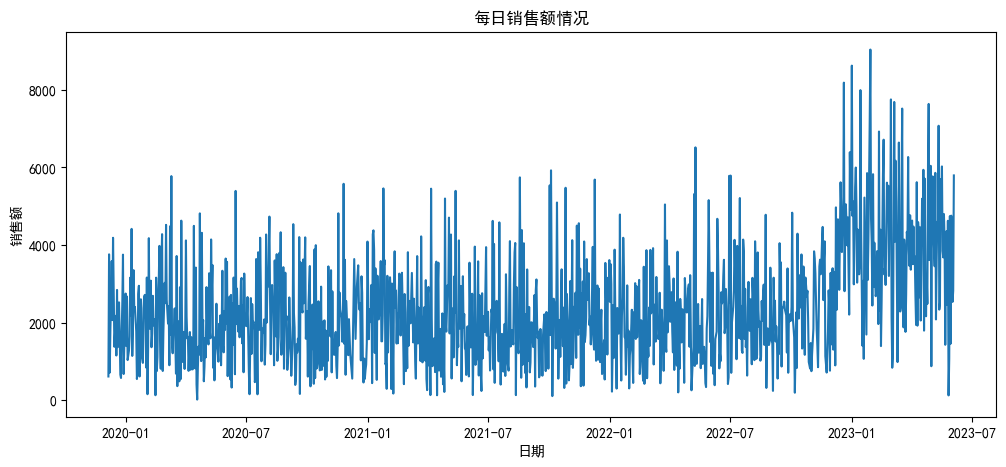

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(data.index,data)
plt.title('每日销售额情况')
plt.xlabel('日期')
plt.ylabel('销售额')

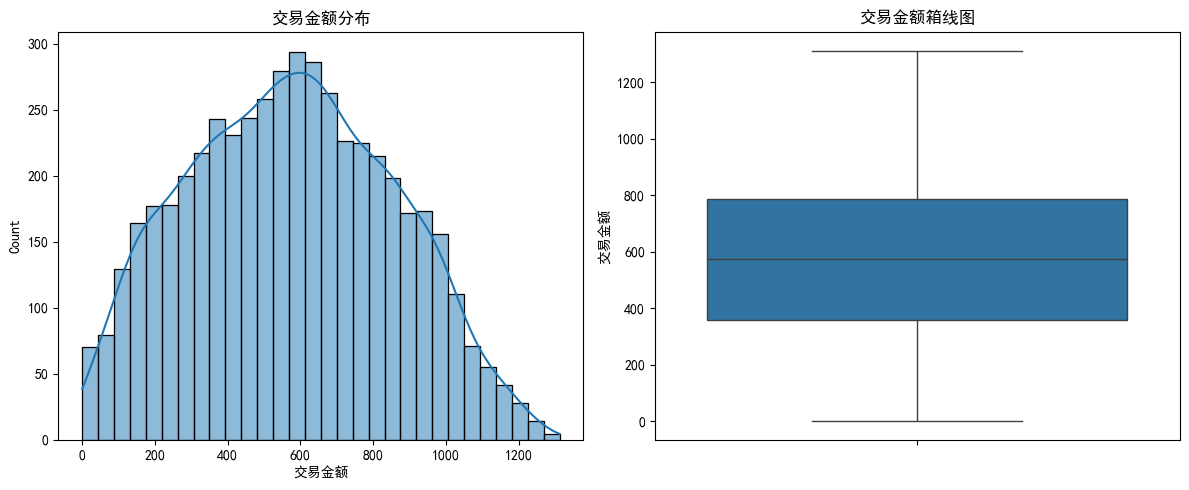

In [21]:
# 3.2 交易金额分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['交易金额'], bins=30, kde=True)
plt.title('交易金额分布')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['交易金额'])
plt.title('交易金额箱线图')
plt.tight_layout()
plt.show()

由交易金额直方图和箱型图可知，整体来看，交易金额呈现出类似正态分布的趋势，在中间区间（大约400 - 700左右）的交易次数最多，说明大部分交易的金额集中在这个范围，箱体的中间线是中位数，可看出交易金额的中位数大约在 600 左右。

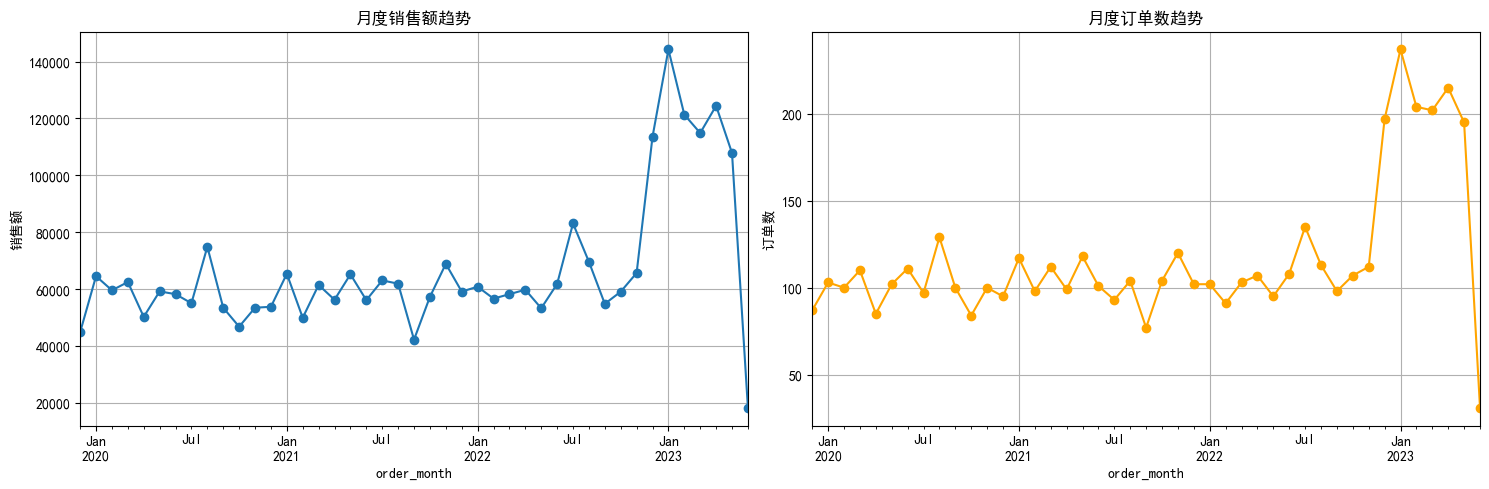

In [22]:
# 3.3 时间趋势分析
df['order_date'] = df['order_time'].dt.date
df['order_month'] = df['order_time'].dt.to_period('M')
df['order_hour'] = df['order_time'].dt.hour
df['order_weekday'] = df['order_time'].dt.weekday

# 月度销售趋势
monthly_sales = df.groupby('order_month')['交易金额'].sum()
monthly_orders = df.groupby('order_month')['订单ID'].nunique()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('月度销售额趋势')
plt.ylabel('销售额')
plt.grid(True)

plt.subplot(1, 2, 2)
monthly_orders.plot(kind='line', marker='o', color='orange')
plt.title('月度订单数趋势')
plt.ylabel('订单数')
plt.grid(True)
plt.tight_layout()
plt.show()

月度销售额和订单数呈现相同的变化趋势，在2020-01至2022-11间，每月销售额在60000元上下波动，订单数在100单上下波动，其中在2020-08、2021-09和2022-07时，波动范围相对较大。到了2022-12月数据激增，在2023-01达到峰值，随后呈现逐步下降趋势。（第一个数据点为2019-12，最后一个数据点为2023-06，因为这两个月数据不完整，暂不和其他完整月份进行比较分析）

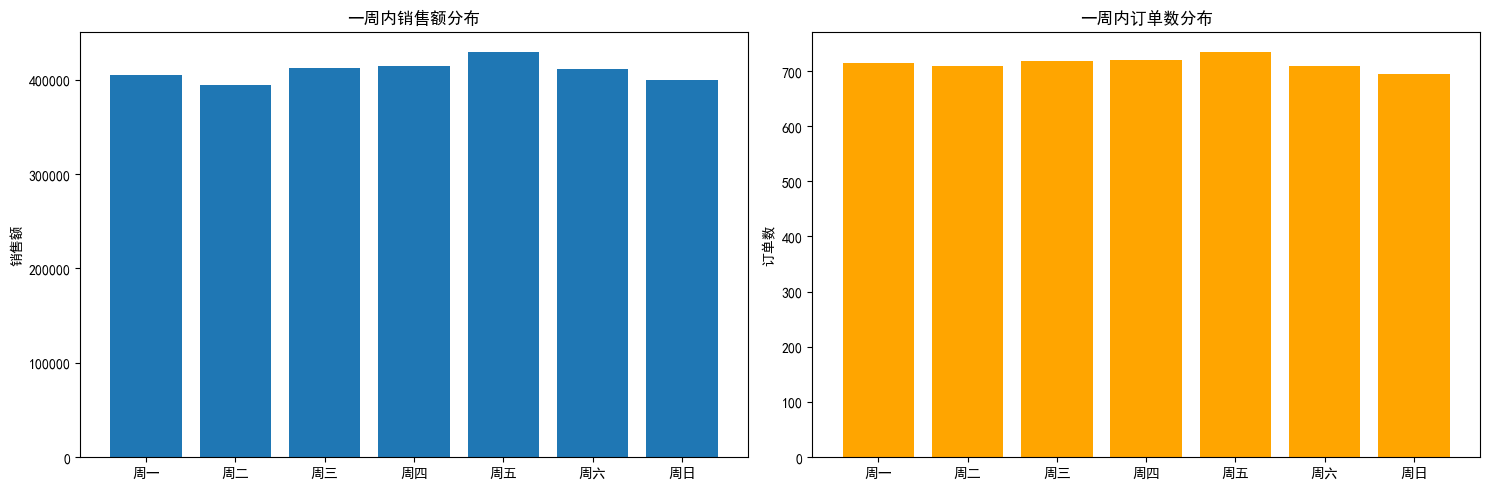

In [23]:
# 3.4 一周内销售分布
weekday_sales = df.groupby('order_weekday')['交易金额'].sum()
weekday_orders = df.groupby('order_weekday')['订单ID'].nunique()

weekday_names = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(weekday_names, weekday_sales)
plt.title('一周内销售额分布')
plt.ylabel('销售额')

plt.subplot(1, 2, 2)
plt.bar(weekday_names, weekday_orders, color='orange')
plt.title('一周内订单数分布')
plt.ylabel('订单数')
plt.tight_layout()
plt.show()

从两张图来看，业务在一周内的销售额和订单数都没有出现明显的波动，销售额都维持在 400000 左右的水平，订单数基本都在 700 左右的范围，每天的经营情况相对稳定，没有特别明显的高峰或低谷时段。

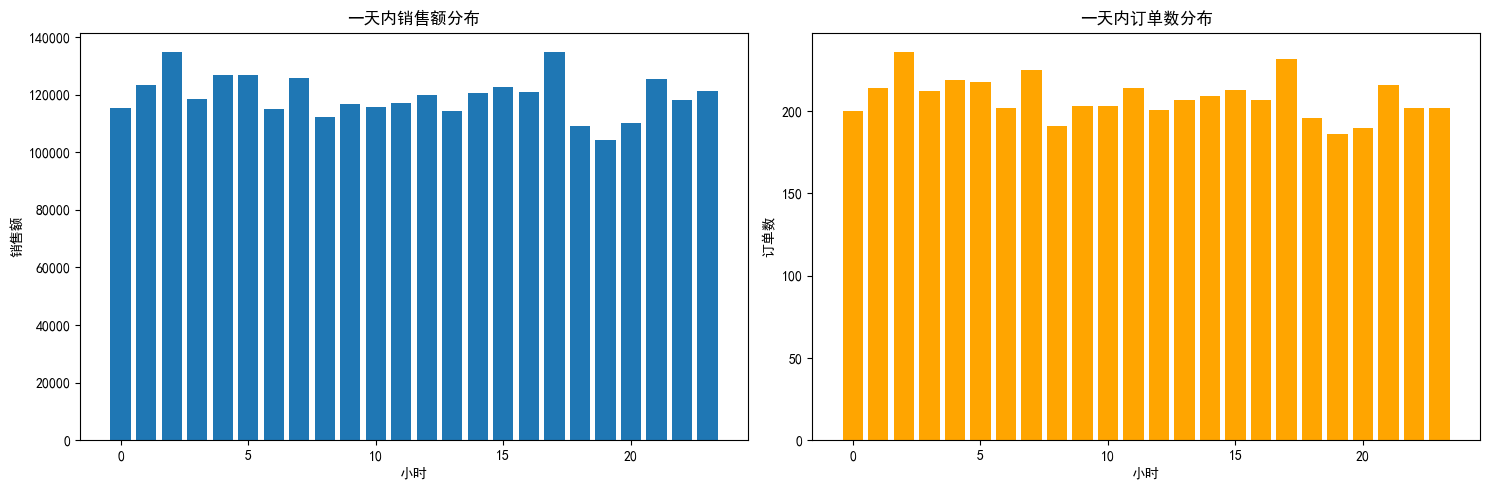

In [24]:
# 3.5 一天内销售分布
hourly_sales = df.groupby('order_hour')['交易金额'].sum()
hourly_orders = df.groupby('order_hour')['订单ID'].nunique()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(hourly_orders.index, hourly_sales.values)
plt.title('一天内销售额分布')
plt.xlabel('小时')
plt.ylabel('销售额')

plt.subplot(1, 2, 2)
plt.bar(hourly_orders.index, hourly_orders.values, color='orange')
plt.title('一天内订单数分布')
plt.xlabel('小时')
plt.ylabel('订单数')
plt.tight_layout()
plt.show()

从上两幅图中我们可以知道用户下单时间的偏好，在一天24小时中，销售额和订单数最大的是02时和17时，最小的是19时。我们可以针对不同的时间点采取不同的营销手段，比如在02时和17时采取限时折扣与特价优惠、满减/满赠活动等。

# 4. 用户消费行为分析

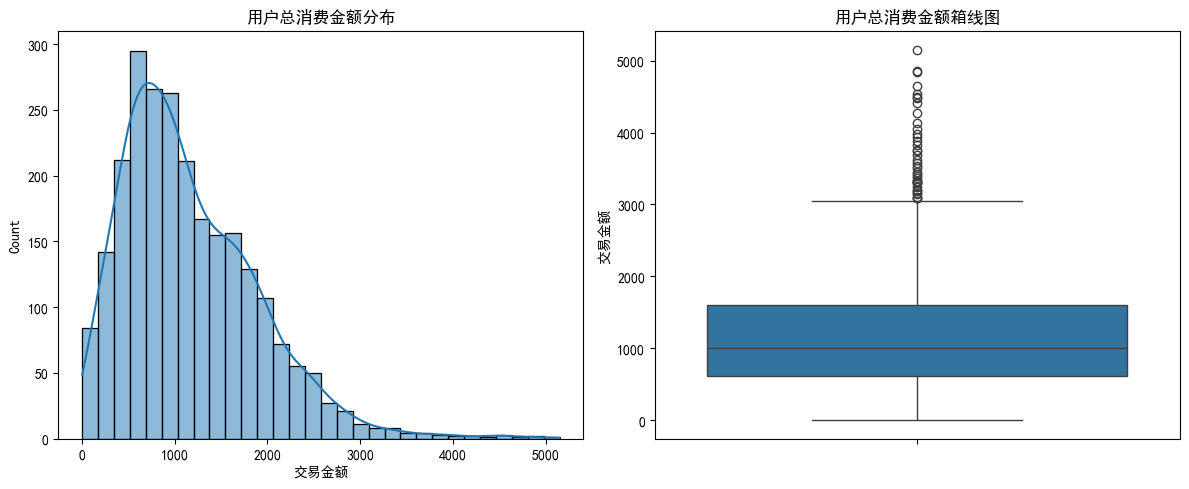

In [25]:
# 4.1 用户消费金额分布
user_spending = df.groupby('用户ID')['交易金额'].sum()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(user_spending, bins=30, kde=True)
plt.title('用户总消费金额分布')

plt.subplot(1, 2, 2)
sns.boxplot(y=user_spending)
plt.title('用户总消费金额箱线图')
plt.tight_layout()
plt.show()

从两张图可以看出，用户总消费金额主要集中在较低水平（0 - 1000 左右为多数），但也存在少数高消费的用户，整体数据分布右偏，且有一定的离散性（存在异常高消费的情况）。这种分布情况可能反映出该群体中，大部分用户是普通消费层级，而少数用户属于高消费层级。
那些在箱线图中处于异常点的用户可能是高价值客户，比如“囤货型”消费者，也有可能是疑似欺诈用户，或疑似操作失误，需要结合其他维度数据进行交叉验证。

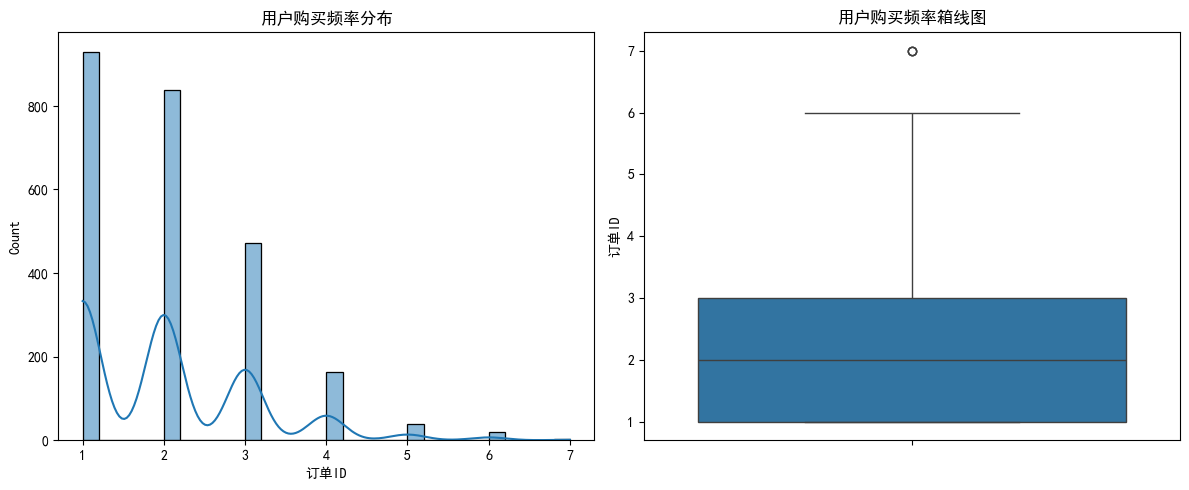

In [26]:
# 4.2 用户购买频率分布
user_frequency = df.groupby('用户ID')['订单ID'].nunique()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(user_frequency, bins=30, kde=True)
plt.title('用户购买频率分布')

plt.subplot(1, 2, 2)
sns.boxplot(y=user_frequency)
plt.title('用户购买频率箱线图')
plt.tight_layout()
plt.show()

从两张图可以看出，用户的购买频率整体较低，大部分用户集中在 1 - 2 次购买，只有极少数用户会进行多次购买，且存在个别购买次数极高的异常用户。这种分布情况可能反映出该产品或服务的用户粘性有待提高，大部分用户属于一次性或少数几次购买的类型。

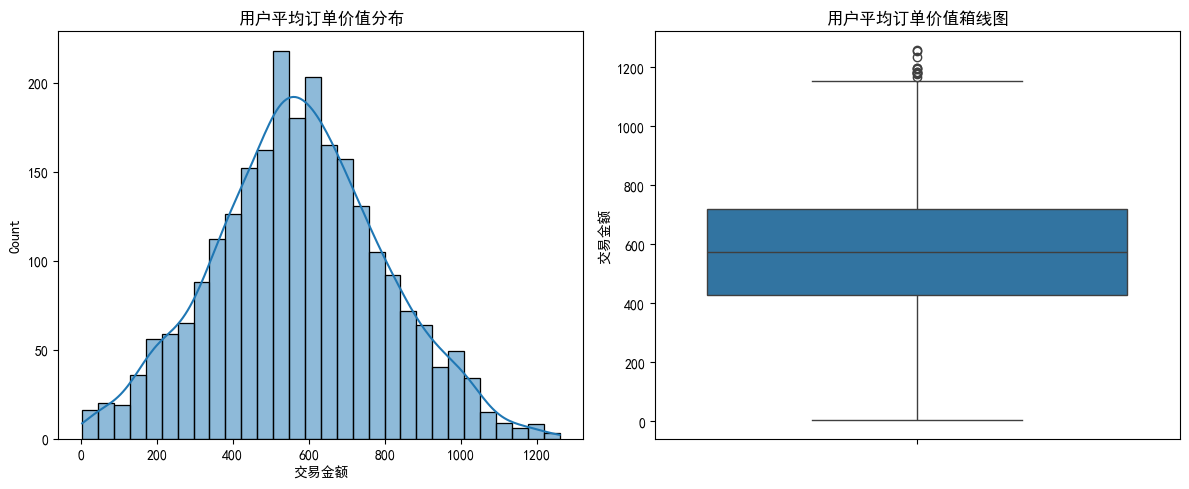

In [27]:
# 4.3 用户平均订单价值分布
user_avg_order = df.groupby('用户ID')['交易金额'].mean()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(user_avg_order, bins=30, kde=True)
plt.title('用户平均订单价值分布')

plt.subplot(1, 2, 2)
sns.boxplot(y=user_avg_order)
plt.title('用户平均订单价值箱线图')
plt.tight_layout()
plt.show()

整体呈现出类似正态分布的趋势，交易金额在中间区间（大约500 - 600左右）的用户数量最多，说明大部分用户的平均订单价值集中在这个范围。箱体的中间线是中位数，可看出用户平均订单价值的中位数大约在 600 左右，存在极个别交易金额在正常范围外（异常点）。

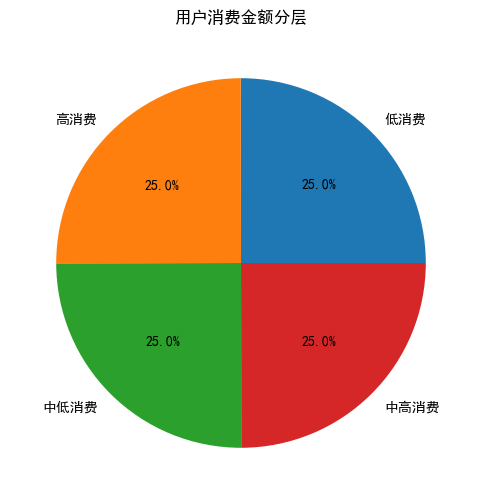

In [28]:
# 4.4 用户分层初步分析（按消费金额）
user_spending_q = pd.qcut(user_spending, q=4, labels=['低消费', '中低消费', '中高消费', '高消费'])
spending_segment_counts = user_spending_q.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(spending_segment_counts, labels=spending_segment_counts.index, autopct='%1.1f%%')
plt.title('用户消费金额分层')
plt.show()

根据消费金额将用户按分位数进行等频分箱，简单分为4类用户：高消费用户、中高消费用户、中低消费用户和低消费用户。

# 5. 交叉分析与相关性探索

不同性别用户的消费行为:


,mean,median,count
性别,,,
女,575.855834,575.770257,2618
男,571.601615,569.929919,2382


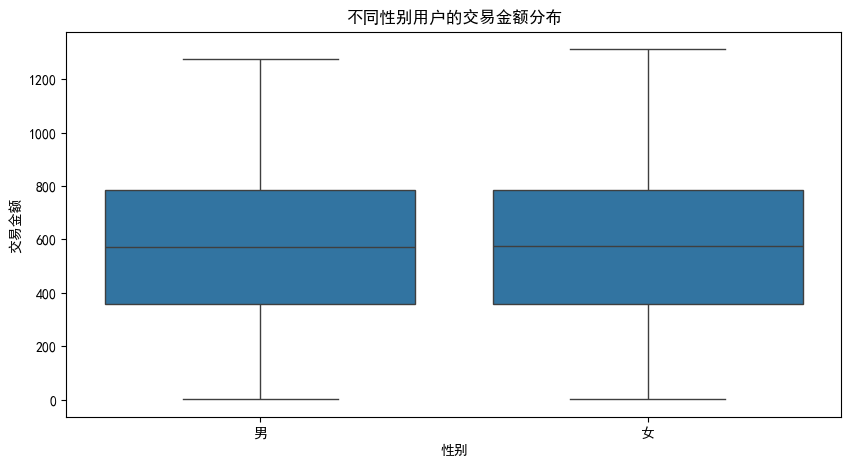

In [29]:
# 5.1 不同性别用户的消费行为差异
gender_spending = df.groupby('性别')['交易金额'].agg(['mean', 'median', 'count'])
print("不同性别用户的消费行为:")
display(gender_spending)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='性别', y='交易金额')
plt.title('不同性别用户的交易金额分布')
plt.show()

从性别方面来看，各性别用户的销售额分布较为均匀，无论是销售额均值、中位数还是订单量，女性的销售数据均稍优于男性数据。

不同婚姻状况用户的消费行为:


,mean,median,count
婚姻状况,,,
已婚,575.238113,575.934414,2339
未婚,572.590633,569.004135,2661


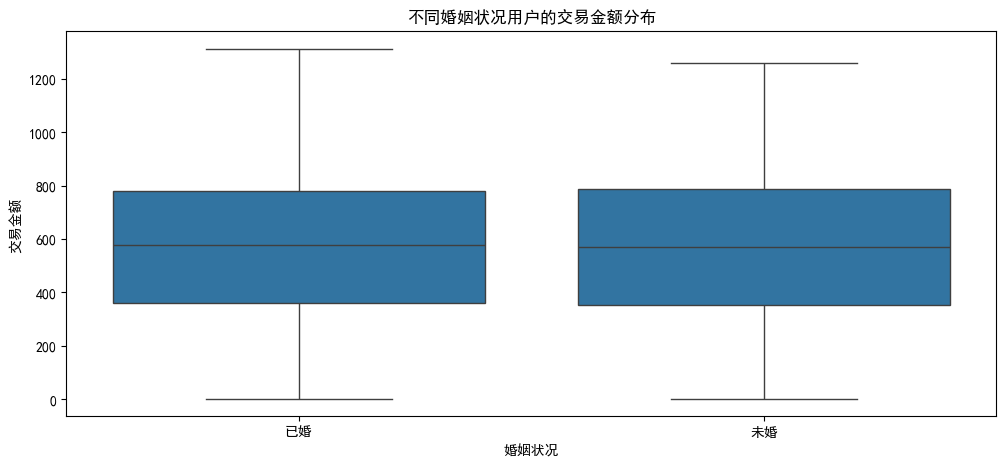

In [30]:
# 5.2 不同婚姻状况用户的消费行为差异
marital_spending = df.groupby('婚姻状况')['交易金额'].agg(['mean', 'median', 'count'])
print("不同婚姻状况用户的消费行为:")
display(marital_spending)

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='婚姻状况', y='交易金额')
plt.title('不同婚姻状况用户的交易金额分布')
plt.show()

从婚姻状况来看，未婚用户的销售量多于已婚用户，但已婚用户的销售额均值、中位数更高，即已婚用户的消费水平较高于未婚用户。

不同文化程度用户的消费行为:


,mean,median,count
文化程度,,,
中专,567.571415,563.096315,788
博士,573.503208,587.114167,963
大专,563.770568,557.739417,1016
本科,587.759887,588.821281,1195
硕士,572.689590,571.241875,1038


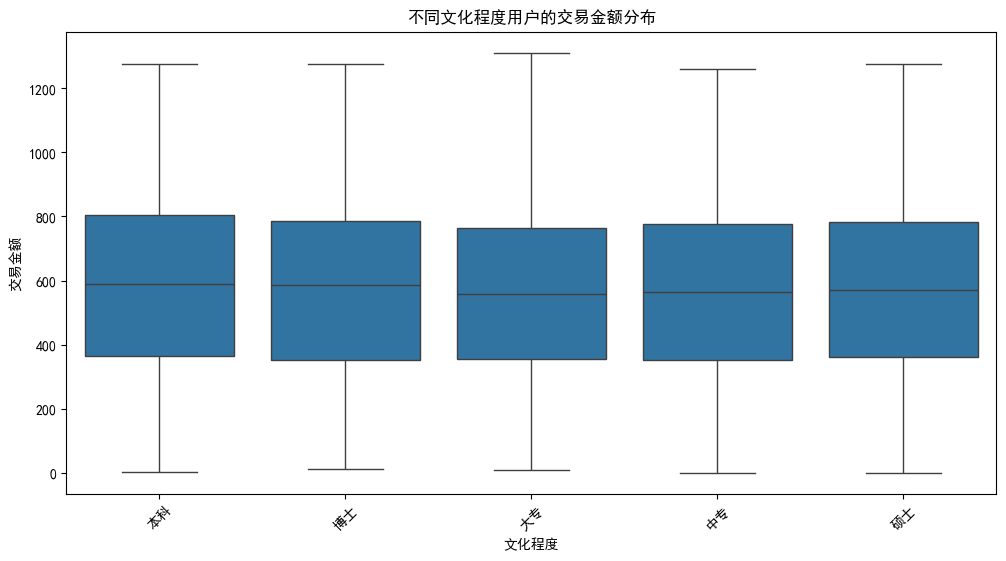

In [31]:
# 5.3 不同文化程度用户的消费行为差异
education_spending = df.groupby('文化程度')['交易金额'].agg(['mean', 'median', 'count'])
print("不同文化程度用户的消费行为:")
display(education_spending)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='文化程度', y='交易金额')
plt.title('不同文化程度用户的交易金额分布')
plt.xticks(rotation=45)
plt.show()

箱线图的上下须延伸至非异常值的最小和最大值，能看到不同文化程度用户的交易金额范围都较广，从接近 0 到 1200 左右都有分布，且各文化程度用户的交易金额分布范围也较为相似，没有明显的某一文化程度用户交易金额整体偏高或偏低的情况。整体而言，不同文化程度用户的交易金额分布特征较为相近。

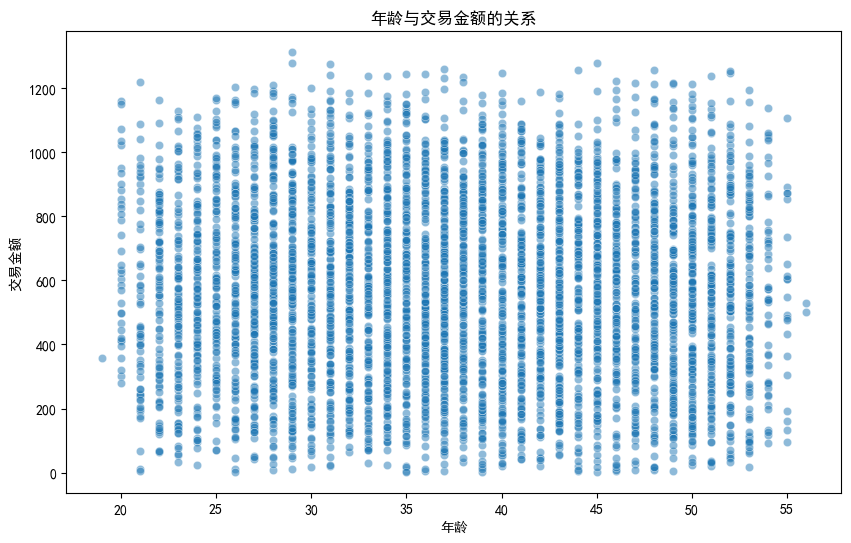

In [32]:
# 5.4 年龄与消费金额的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='user_age', y='交易金额', alpha=0.5)
plt.title('年龄与交易金额的关系')
plt.xlabel('年龄')
plt.ylabel('交易金额')
plt.show()

In [33]:
# 计算年龄与消费金额的相关系数
age_spending_corr = df[['user_age', '交易金额']].corr().iloc[0, 1]
print(f"年龄与交易金额的相关系数: {age_spending_corr:.3f}")

年龄与交易金额的相关系数: -0.026


从图中可以看出：
·整体上，不同年龄的用户都有不同的交易金额，且交易金额分布较为分散。
·大部分用户的交易金额集中在 400 - 1200 之间，在这个区间内，各个年龄阶段都有较多的点分布，说明不同年龄的用户在这一交易金额范围内都较为活跃。
·同时，也存在部分交易金额较低（接近 0）的情况，且在各个年龄阶段都有少量分布，表明不同年龄都有少量低金额交易的情况。
综合来看，年龄与交易金额之间没有呈现出非常明显的线性相关趋势（相关系数为-0.026），交易金额在不同年龄阶段的分布较为广泛且相对均匀，各个年龄的用户都有不同层次的交易金额表现。

# 6. 用户价值初步评估

前1407名用户（占用户总数的57.15%）贡献了80%的销售额


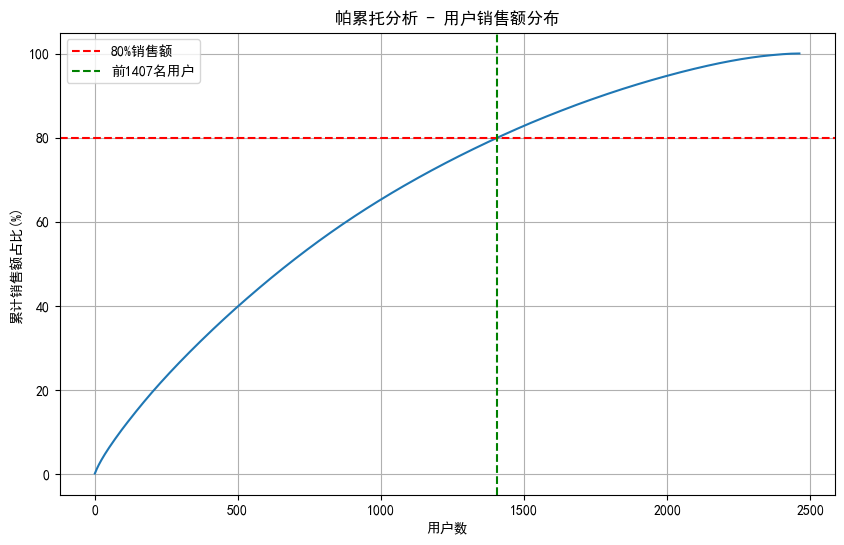

In [34]:
# 帕累托分析（80/20法则）
user_spending_sorted = user_spending.sort_values(ascending=False)
cumulative_percentage = user_spending_sorted.cumsum() / user_spending_sorted.sum() * 100

# 找出贡献80%销售额的用户比例
top_users_80 = (cumulative_percentage <= 80).sum()
total_users = len(user_spending_sorted)
percentage_top_users = top_users_80 / total_users * 100

print(f"前{top_users_80}名用户（占用户总数的{percentage_top_users:.2f}%）贡献了80%的销售额")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage)
plt.axhline(y=80, color='r', linestyle='--', label='80%销售额')
plt.axvline(x=top_users_80, color='g', linestyle='--', label=f'前{top_users_80}名用户')
plt.xlabel('用户数')
plt.ylabel('累计销售额占比(%)')
plt.title('帕累托分析 - 用户销售额分布')
plt.legend()
plt.grid(True)
plt.show()

根据用户销售额从大到小排序，画出用户数-累计销售额占比的帕累托曲线，由图可知，帕累托曲线是一条相对平滑、渐进的弧线，而没有陡升后骤缓的“膝盖状”拐点，说明用户贡献分布连续且平滑，业务的销售额分布相对均衡，而不是高度集中在少数头部用户手中，中产阶级用户强大。其中前1407名用户（占用户总人数的57.15%）贡献了80%的销售额，不符合二八法则。对于该分布的用户特征，我们应该采取**保大促中抓小**的策略。**保大**：头部用户（累计占比达50%的用户）依然重要，需要重点维护，防止流失；**促中**:这是重中之重！针对庞大的中部用户群体（累计占比从50%到90%的用户），应该设计规模化、自动化的营销策略，比如：推送相关产品推荐和优惠券，提升客单价和复购率；建立用户社群，增强归属感；提供优质的自助服务，降低服务成本。**抓小**：通过更高效的渠道（如邮件营销、自动化广告）培育长尾用户（余下用户），降低获客和运用成本。